## TASK
Dataset for this Image Classification problem is uploaded here
- The Folder names are self-explanatory, they contain the names of the Pieces and the Images are
singular images
- Task is to perform below steps:
1. Load dataset
2. Perform EDA and visualisation
3. Do image pre-processing steps if needed
4. Train the model on at least 5 different type of neural networks for image classification
5. Perform evaluation on the test set for every neural network used and compare the scores
6. Write code for inferencing the images for the best model
7. Do hyperparameter tuning if needed

### Kanishk Joshi - 19BCE10454

In [1]:
#Importing all the necessary libraries
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

## Analyzing The Dataset

In [2]:
# defing the base directory for images
base_dir = r'E:\LoopR Assignment\loopr_vit_dse_assignment_data'
os.listdir(base_dir)

['bishop_resized',
 'knight-resize',
 'pawn_resized',
 'Queen-Resized',
 'Rook-resize']

In [3]:
# Getting the number of each in each category
# defining file path for each subclass
bishop_resized = os.path.join(base_dir, 'bishop_resized')
knight_resize = os.path.join(base_dir, 'knight-resize')
pawn_resized = os.path.join(base_dir, 'pawn_resized')
Queen_Resized = os.path.join(base_dir, 'Queen-Resized')
Rook_resize = os.path.join(base_dir, 'Rook-resize')

print('total bishop_resized images:', len(os.listdir(bishop_resized)))
print('total knight-resize images:', len(os.listdir(knight_resize)))
print('total pawn_resized images:', len(os.listdir(pawn_resized)))
print('total Queen-Resized images:', len(os.listdir(Queen_Resized)))
print('total Rook-resize images:', len(os.listdir(Rook_resize)))

total bishop_resized images: 141
total knight-resize images: 174
total pawn_resized images: 82
total Queen-Resized images: 115
total Rook-resize images: 139


In [4]:
bishop_files = os.listdir(bishop_resized)
print(bishop_files[:10])

knight_files = os.listdir(knight_resize)
print(knight_files[:10])

pawn_files = os.listdir(pawn_resized)
print(pawn_files[:10])

Queen_files = os.listdir(Queen_Resized)
print(Queen_files[:10])

Rook_files = os.listdir(Rook_resize)
print(Rook_files[:10])

['00000000_resized.jpg', '00000002_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000006_resized.jpg', '00000008_resized.jpg', '00000009_resized.jpg', '00000010_resized.jpg', '00000013_resized.jpg']
['00000001_resized.jpg', '00000002_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000006_resized.jpg', '00000007_resized.jpg', '00000009_resized.jpg', '00000010_resized.jpg', '00000011_resized.jpg']
['00000001_resized.jpg', '00000002_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000006_resized.jpg', '00000007_resized.jpg', '00000009_resized.jpg', '00000010_resized.jpg', '00000011_resized.jpg']
['00000000_resized.jpg', '00000001_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000007_resized.jpg', '00000008_resized.jpg', '00000010_resized.jpg', '00000011_resized.jpg', '00000012_resized.jpg']
['00000001_resized.jpg', '00000002_r

E:\LoopR Assignment\loopr_vit_dse_assignment_data\bishop_resized\00000000_resized.jpg


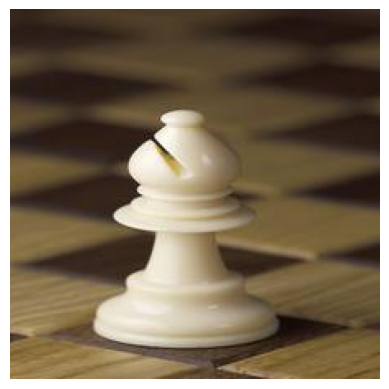

E:\LoopR Assignment\loopr_vit_dse_assignment_data\bishop_resized\00000002_resized.jpg


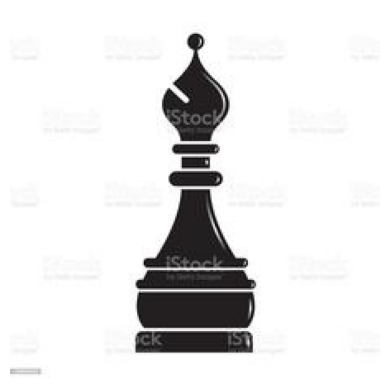

E:\LoopR Assignment\loopr_vit_dse_assignment_data\knight-resize\00000001_resized.jpg


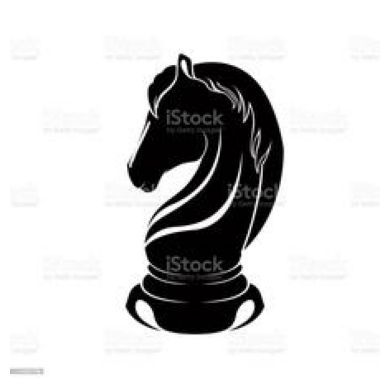

E:\LoopR Assignment\loopr_vit_dse_assignment_data\knight-resize\00000002_resized.jpg


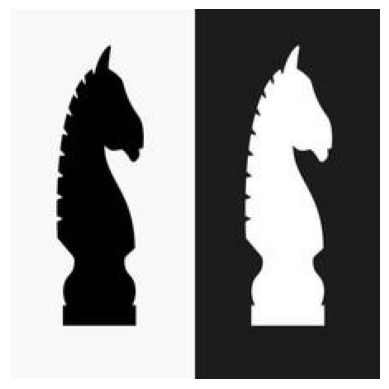

E:\LoopR Assignment\loopr_vit_dse_assignment_data\pawn_resized\00000001_resized.jpg


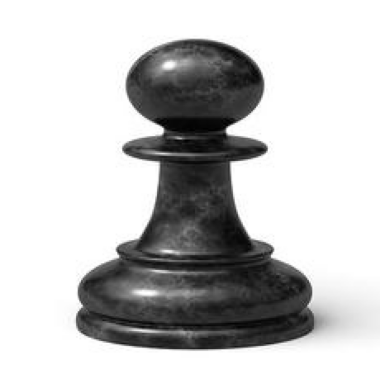

E:\LoopR Assignment\loopr_vit_dse_assignment_data\pawn_resized\00000002_resized.jpg


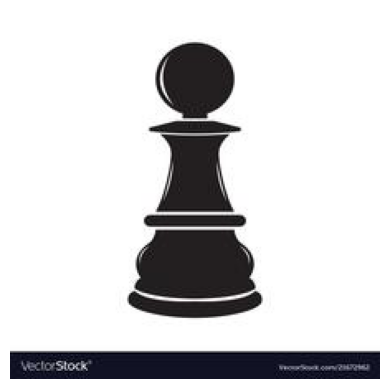

E:\LoopR Assignment\loopr_vit_dse_assignment_data\Queen-Resized\00000000_resized.jpg


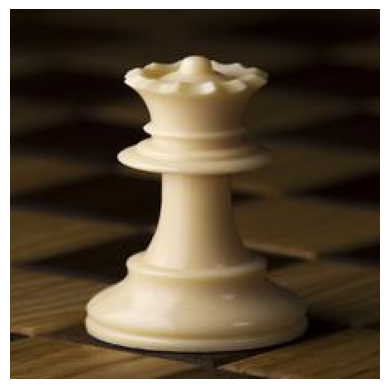

E:\LoopR Assignment\loopr_vit_dse_assignment_data\Queen-Resized\00000001_resized.jpg


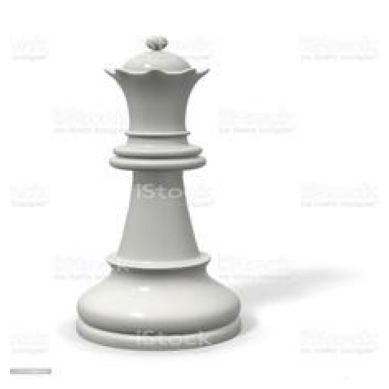

E:\LoopR Assignment\loopr_vit_dse_assignment_data\Rook-resize\00000001_resized.jpg


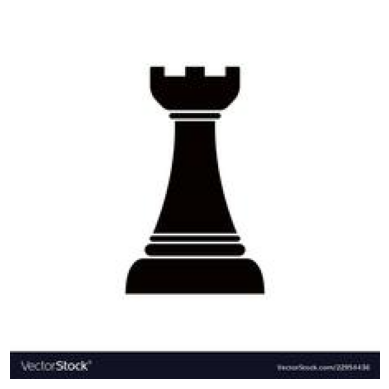

E:\LoopR Assignment\loopr_vit_dse_assignment_data\Rook-resize\00000002_resized.jpg


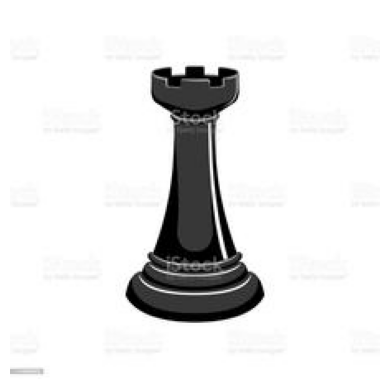

In [5]:
# plotting images from each directory

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2  # chow many images to display from one folder

next_bishop = [os.path.join(bishop_resized, fname) for fname in bishop_files[pic_index-2:pic_index]]
next_knight = [os.path.join(knight_resize, fname) for fname in knight_files[pic_index-2:pic_index]]
next_pawn = [os.path.join(pawn_resized, fname) for fname in pawn_files[pic_index-2:pic_index]]
next_Queen = [os.path.join(Queen_Resized, fname) for fname in Queen_files[pic_index-2:pic_index]]
next_Rook = [os.path.join(Rook_resize, fname) for fname in Rook_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_bishop+next_knight+next_pawn+next_Queen+next_Rook):
    print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

## Data Preprocessing

In [6]:
# set the batch size, and target size(can be changed for hyperparameter tuning)
batch_size = 16
img_height = 224
img_width = 224
input_shape = (img_height, img_width, 3)

In [7]:
# using the Image Data Generator to import the images

# Images need to be normalized and split into training and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.3) # Images need to be normalized

# loading the training images to input in the model
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

#loading validation images to be put in to the model
validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 458 images belonging to 5 classes.
Found 193 images belonging to 5 classes.


## MODEL 1 Using a convolutional neural network

In [8]:
# model 1
model1 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')

])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 16)        0

In [9]:
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history1 = model1.fit_generator(train_generator, epochs=25, validation_data=validation_generator)

C:\Users\Kanishk Joshi\anaconda3\envs\looprAssignment\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
29/29 [==============================] - 31s 987ms/step - loss: 3.6510 - accuracy: 0.2293 - val_loss: 1.6076 - val_accuracy: 0.2798
Epoch 2/25
29/29 [==============================] - 28s 948ms/step - loss: 1.5790 - accuracy: 0.3362 - val_loss: 1.5872 - val_accuracy: 0.2798
Epoch 3/25
29/29 [==============================] - 28s 970ms/step - loss: 1.4163 - accuracy: 0.4017 - val_loss: 1.5022 - val_accuracy: 0.4041
Epoch 4/25
29/29 [==============================] - 28s 976ms/step - loss: 1.1096 - accuracy: 0.5786 - val_loss: 1.4695 - val_accuracy: 0.3731
Epoch 5/25
29/29 [==============================] - 27s 943ms/step - loss: 0.7975 - accuracy: 0.7358 - val_loss: 1.4193 - val_accuracy: 0.4560
Epoch 6/25
29/29 [==============================] - 30s 1s/step - loss: 0.5478 - accuracy: 0.8013 - val_loss: 1.4518 - val_accuracy: 0.4663
Epoch 7/25
29/29 [==============================] - 29s 1s/step - loss: 0.4114 - accuracy: 0.8646 - val_loss: 1.6068 - val_accuracy: 0.4508
Epoch

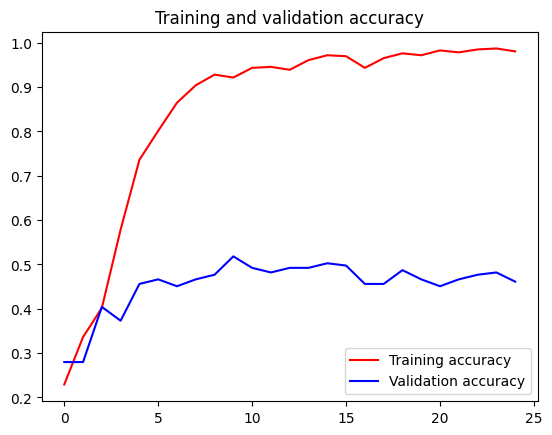

<Figure size 640x480 with 0 Axes>

In [11]:
# plotting the losses
import matplotlib.pyplot as plt

# Plot the results

#getting the values of accuracy for all the epochs
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

# plotting training accuracy vs validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

The above model is clearly overfitting as the training accuracy is very high but the validation accuracy is very low.
This may be due to two reasons-
1. The model requires more data (Use Image Augmentation)
2. The model architecture needs to be imporved

## Model 2 Using Image Data Augmentation

In [12]:
train_datagen1 = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.3,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest') 

train_generator1 = train_datagen1.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator1 = train_datagen1.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 458 images belonging to 5 classes.
Found 193 images belonging to 5 classes.


In [13]:
history2 = model1.fit(train_generator1, epochs=20, validation_data=validation_generator1)

Epoch 1/20
29/29 [==============================] - 44s 2s/step - loss: 2.4158 - accuracy: 0.2314 - val_loss: 1.6161 - val_accuracy: 0.2280
Epoch 2/20
29/29 [==============================] - 45s 2s/step - loss: 1.5860 - accuracy: 0.2795 - val_loss: 1.5981 - val_accuracy: 0.2124
Epoch 3/20
29/29 [==============================] - 46s 2s/step - loss: 1.5804 - accuracy: 0.2686 - val_loss: 1.5909 - val_accuracy: 0.2021
Epoch 4/20
29/29 [==============================] - 45s 2s/step - loss: 1.5796 - accuracy: 0.2620 - val_loss: 1.5977 - val_accuracy: 0.1813
Epoch 5/20
29/29 [==============================] - 46s 2s/step - loss: 1.5641 - accuracy: 0.2686 - val_loss: 1.5971 - val_accuracy: 0.2176
Epoch 6/20
29/29 [==============================] - 45s 2s/step - loss: 1.5652 - accuracy: 0.2707 - val_loss: 1.5907 - val_accuracy: 0.2383
Epoch 7/20
29/29 [==============================] - 43s 1s/step - loss: 1.5589 - accuracy: 0.2751 - val_loss: 1.6006 - val_accuracy: 0.2280
Epoch 8/20
29/29 [==

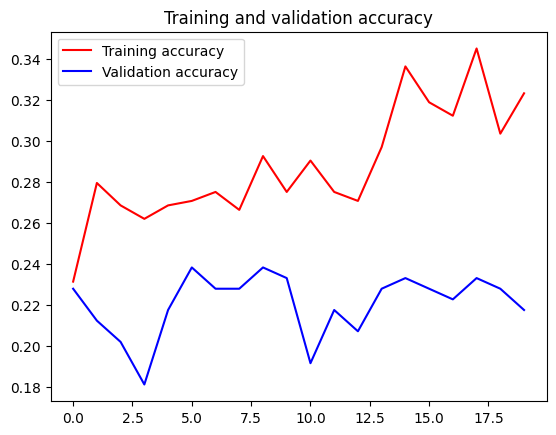

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Plot the results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

The model is very messy with very less accuracy.
Changing the model architecture may help.

## Model 3 (Using Augmented Image data,Another Model architecture(adding more hidden layers))

In [15]:
# model 3
model3 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(128, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')

])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 111, 111, 128)     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 54, 54, 64)       

In [16]:
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history3 = model3.fit(train_generator1, epochs=10, validation_data=validation_generator1)

Epoch 1/10
29/29 [==============================] - 118s 4s/step - loss: 2.3098 - accuracy: 0.2227 - val_loss: 1.6061 - val_accuracy: 0.2332
Epoch 2/10
29/29 [==============================] - 111s 4s/step - loss: 1.5933 - accuracy: 0.2555 - val_loss: 1.6035 - val_accuracy: 0.2124
Epoch 3/10
29/29 [==============================] - 111s 4s/step - loss: 1.5848 - accuracy: 0.2642 - val_loss: 1.5972 - val_accuracy: 0.2332
Epoch 4/10
29/29 [==============================] - 111s 4s/step - loss: 1.5839 - accuracy: 0.2664 - val_loss: 1.5950 - val_accuracy: 0.2280
Epoch 5/10
29/29 [==============================] - 114s 4s/step - loss: 1.5839 - accuracy: 0.2467 - val_loss: 1.5918 - val_accuracy: 0.2228
Epoch 6/10
29/29 [==============================] - 114s 4s/step - loss: 1.5785 - accuracy: 0.2773 - val_loss: 1.5899 - val_accuracy: 0.2642
Epoch 7/10
29/29 [==============================] - 113s 4s/step - loss: 1.5712 - accuracy: 0.2751 - val_loss: 1.5877 - val_accuracy: 0.1917
Epoch 8/10
29

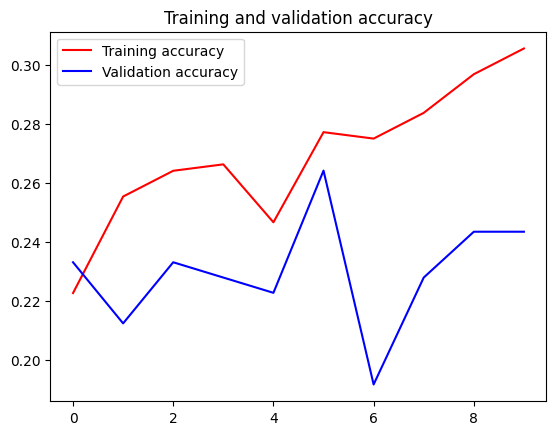

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Plot the results
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

The model may not be overfitting now But now its underfitting. To solve we may need to increase the hidden layers in the architecture. \n

Training such models may take up very long time. In such cases it is better to use Transfer Learning.

Transfer Learning is Deep Learning is a deep learning technique which comprises of using weights and activations of a model which has already been trained on a huge dataset of images with a lot of hidden layers.



## Model 4 - ResNet

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50 
res = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res.trainable = False

In [20]:
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [21]:
#model 4
model4 = tf.keras.models.Sequential([

    res,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')

])

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               12845184  
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 36,434,053
Trainable params: 12,846,085
Non-trainable params: 23,587,968
_________________________________

In [22]:
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# fitting the model on image augmented data
history4 = model4.fit(train_generator1, epochs=20, validation_data=validation_generator1)

Epoch 1/20
29/29 [==============================] - 119s 4s/step - loss: 1.8802 - accuracy: 0.2052 - val_loss: 5.1684 - val_accuracy: 0.3057
Epoch 2/20
29/29 [==============================] - 99s 3s/step - loss: 1.5204 - accuracy: 0.2969 - val_loss: 4.6488 - val_accuracy: 0.2746
Epoch 3/20
29/29 [==============================] - 100s 3s/step - loss: 1.5043 - accuracy: 0.3319 - val_loss: 3.6705 - val_accuracy: 0.2746
Epoch 4/20
29/29 [==============================] - 100s 3s/step - loss: 1.4758 - accuracy: 0.3515 - val_loss: 7.1613 - val_accuracy: 0.2228
Epoch 5/20
29/29 [==============================] - 100s 3s/step - loss: 1.4221 - accuracy: 0.3734 - val_loss: 5.4577 - val_accuracy: 0.2953
Epoch 6/20
29/29 [==============================] - 100s 3s/step - loss: 1.4385 - accuracy: 0.3755 - val_loss: 2.4865 - val_accuracy: 0.3420
Epoch 7/20
29/29 [==============================] - 100s 3s/step - loss: 1.4170 - accuracy: 0.3865 - val_loss: 2.1337 - val_accuracy: 0.3161
Epoch 8/20
29/

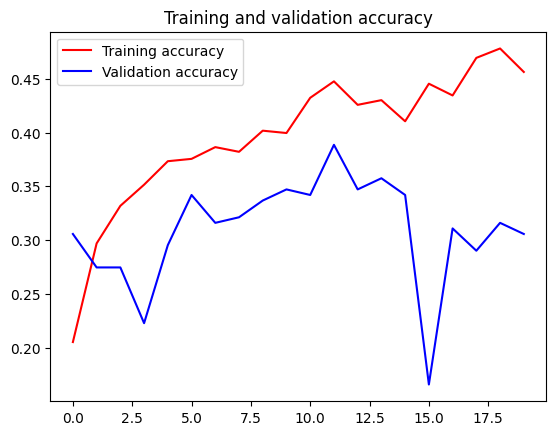

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the results
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Another case of overfitting...

## Model 5 - VGG16

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16 
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg.trainable = False

In [26]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
#model 5
model5 = tf.keras.models.Sequential([

    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')

])

model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 17,927,237
Trainable params: 3,212,293
Non-trainable params: 14,714,944
__________________________________

In [28]:
model5.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history5 = model5.fit(train_generator1, epochs=20, validation_data=validation_generator1)

Epoch 1/20
29/29 [==============================] - 223s 8s/step - loss: 1.9477 - accuracy: 0.4061 - val_loss: 3.0418 - val_accuracy: 0.4404
Epoch 2/20
29/29 [==============================] - 217s 8s/step - loss: 0.9964 - accuracy: 0.6310 - val_loss: 1.9872 - val_accuracy: 0.4870
Epoch 3/20
29/29 [==============================] - 216s 8s/step - loss: 0.8548 - accuracy: 0.7052 - val_loss: 1.3197 - val_accuracy: 0.5389
Epoch 4/20
29/29 [==============================] - 219s 8s/step - loss: 0.7542 - accuracy: 0.7227 - val_loss: 0.9581 - val_accuracy: 0.6373
Epoch 5/20
29/29 [==============================] - 217s 8s/step - loss: 0.6710 - accuracy: 0.7489 - val_loss: 0.8250 - val_accuracy: 0.6995
Epoch 6/20
29/29 [==============================] - 221s 8s/step - loss: 0.6071 - accuracy: 0.7969 - val_loss: 0.8475 - val_accuracy: 0.7047
Epoch 7/20
29/29 [==============================] - 220s 8s/step - loss: 0.5531 - accuracy: 0.7882 - val_loss: 0.8501 - val_accuracy: 0.6839
Epoch 8/20
29

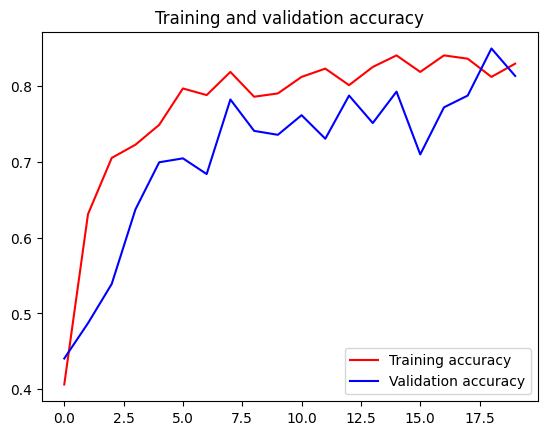

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot the results
#getting the values of accuracy for all the epochs
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

#plot training accuracy vs validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

THe VGG16 Model has achieved a pretty good accuracy considering the performance other models. And it is also not overfitting.

## Model 6 - Inception Network

In [31]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
inception.trainable = False

In [32]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 rmalization)                   )                                                      

 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_12[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_12 (BatchN  (None, 25, 25, 96)  288         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_13 (BatchN  (None, 25, 25, 32)  96          ['conv2d_16[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_24 (BatchN  (None, 25, 25, 64)  192         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_7[0][0]']        
                                                                                                  
 conv2d_39 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_36 (BatchN  (None, 12, 12, 128)  384        ['conv2d_39[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_49 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_46 (BatchN  (None, 12, 12, 160)  480        ['conv2d_49[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_46[0][0]'] 
                                                                                                  
 conv2d_50 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_56[0][0]'] 
                                                                                                  
 conv2d_60 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_57 (BatchN  (None, 12, 12, 160)  480        ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_57[0][0]'] 
          

                                                                                                  
 batch_normalization_67 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_67[0][0]'] 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_75 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_79 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_72 (BatchN  (None, 12, 12, 192)  576        ['conv2d_75[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 12, 12, 192)  576        ['conv2d_79[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_78 (BatchN  (None, 5, 5, 320)   960         ['conv2d_81[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_80[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_81[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_84[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_85[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 batch_normalization_95 (BatchN  (None, 5, 5, 192)   576         ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 mixed9_1 

In [33]:
#model 6

model6 = tf.keras.models.Sequential([

    inception,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')

])

model6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               6553728   
                                                                 
 batch_normalization_96 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 28,357,669
Trainable params: 6,554,629
Non-trainable params: 21,803,040
__________________________________

In [34]:
model6.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history6 = model6.fit(train_generator1, epochs=15, validation_data=validation_generator1)

Epoch 1/15
29/29 [==============================] - 92s 3s/step - loss: 1.4852 - accuracy: 0.4803 - val_loss: 1.6963 - val_accuracy: 0.5699
Epoch 2/15
29/29 [==============================] - 68s 2s/step - loss: 0.9347 - accuracy: 0.6594 - val_loss: 1.1117 - val_accuracy: 0.6528
Epoch 3/15
29/29 [==============================] - 68s 2s/step - loss: 0.7735 - accuracy: 0.7052 - val_loss: 0.9909 - val_accuracy: 0.6736
Epoch 4/15
29/29 [==============================] - 67s 2s/step - loss: 0.6163 - accuracy: 0.7860 - val_loss: 0.9595 - val_accuracy: 0.6425
Epoch 5/15
29/29 [==============================] - 69s 2s/step - loss: 0.6715 - accuracy: 0.7358 - val_loss: 0.7771 - val_accuracy: 0.7098
Epoch 6/15
29/29 [==============================] - 80s 3s/step - loss: 0.6023 - accuracy: 0.7882 - val_loss: 0.9619 - val_accuracy: 0.6477
Epoch 7/15
29/29 [==============================] - 78s 3s/step - loss: 0.4853 - accuracy: 0.8210 - val_loss: 3.3483 - val_accuracy: 0.3472
Epoch 8/15
29/29 [==

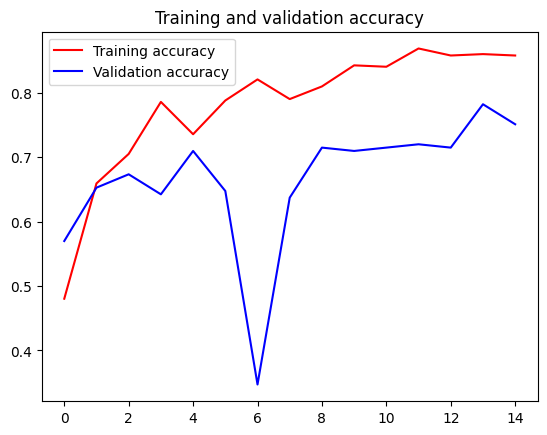

<Figure size 640x480 with 0 Axes>

In [36]:
# Plot the results
#getting the values of accuracy for all the epochs
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

#pplotting the training accuracy vs validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Model 7 - MobileNet

In [37]:
mobile = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
mobile.trainable = False

In [38]:
#model 7


model7 = tf.keras.models.Sequential([

    mobile,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')

])

model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               8028288   
                                                                 
 batch_normalization_97 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 10,287,429
Trainable params: 8,029,189
N

In [39]:
model7.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history7 = model7.fit(train_generator1, epochs=15, validation_data=validation_generator1)

Epoch 1/15
29/29 [==============================] - 81s 2s/step - loss: 1.6890 - accuracy: 0.4782 - val_loss: 2.8790 - val_accuracy: 0.5907
Epoch 2/15
29/29 [==============================] - 55s 2s/step - loss: 0.8108 - accuracy: 0.6834 - val_loss: 0.8903 - val_accuracy: 0.7358
Epoch 3/15
29/29 [==============================] - 49s 2s/step - loss: 0.6551 - accuracy: 0.7751 - val_loss: 0.7852 - val_accuracy: 0.7668
Epoch 4/15
29/29 [==============================] - 47s 2s/step - loss: 0.5222 - accuracy: 0.8341 - val_loss: 0.7517 - val_accuracy: 0.7565
Epoch 5/15
29/29 [==============================] - 48s 2s/step - loss: 0.5148 - accuracy: 0.8384 - val_loss: 0.8694 - val_accuracy: 0.7409
Epoch 6/15
29/29 [==============================] - 47s 2s/step - loss: 0.4343 - accuracy: 0.8515 - val_loss: 0.7209 - val_accuracy: 0.7513
Epoch 7/15
29/29 [==============================] - 48s 2s/step - loss: 0.4302 - accuracy: 0.8428 - val_loss: 0.6061 - val_accuracy: 0.7927
Epoch 8/15
29/29 [==

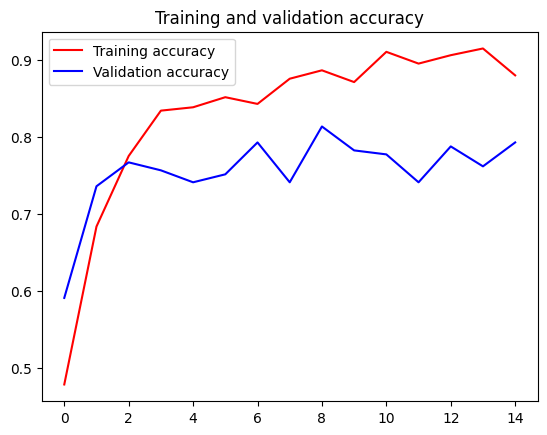

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot the results
#getting the values of accuracy for all the epochs
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(len(acc))

#pplotting the training accuracy vs validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Model Selection

FOr Model Selection first we need to compare the **Validation Accuracy** of our models

In [42]:

# Evaluation Each Model
model1_loss,model1_acc = model1.evaluate(validation_generator)
model2_loss,model2_acc = model1.evaluate(validation_generator1)
model3_loss,model3_acc = model3.evaluate(validation_generator1)
model4_loss,model4_acc = model4.evaluate(validation_generator1)
model5_loss,model5_acc = model5.evaluate(validation_generator1)
model6_loss,model6_acc = model6.evaluate(validation_generator1)
model7_loss,model7_acc = model7.evaluate(validation_generator1)

print('Model1 ConvNet Accuracy : ', model1_acc)
print('Model2 Data Augmented ConvNet Accuracy : ', model2_acc)
print('Model3 Increased Hidden Layers ConvNet Accuracy : ', model3_acc)
print('Model4 ResNet Accuracy : ', model4_acc)
print('Model5 VGG16 Accuracy : ', model5_acc)
print('Model6 InceptionNet Accuracy : ', model6_acc)
print('Model7 MobileNet Accuracy : ', model7_acc)

13/13 [==============================] - 13s 986ms/step - loss: 0.5566 - accuracy: 0.7772
Model1 ConvNet Accuracy :  0.2590673565864563
Model2 Data Augmented ConvNet Accuracy :  0.21243523061275482
Model3 Increased Hidden Layers ConvNet Accuracy :  0.2331606149673462
Model4 ResNet Accuracy :  0.29015544056892395
Model5 VGG16 Accuracy :  0.803108811378479
Model6 InceptionNet Accuracy :  0.6994818449020386
Model7 MobileNet Accuracy :  0.7772020697593689


**VGG-16 > MobileNet > InceptionNet > Resnet > Simple ConvNet**

#### VGG -16 model gives the best accuracy = 0.8031
#### Therefore VGG16 model will be used for making predictions


## Making Prediction using Model 5

['bishop_resized', 'knight-resize', 'pawn_resized', 'Queen-Resized', 'Rook-resize']


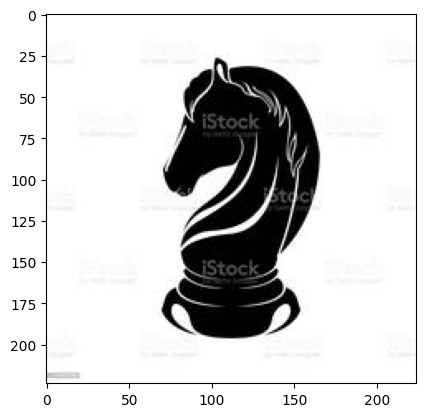

1/1 [==============================] - 0s 486ms/step
3
The piece in the image is Knight


In [89]:
from tensorflow.keras.preprocessing import image
import os

images = os.listdir(r'E:\LoopR Assignment\loopr_vit_dse_assignment_data')

print(images)


# predicting images

#defuning the path for the image to perform prediction
path = r'E:\LoopR Assignment\loopr_vit_dse_assignment_data\knight-resize\00000001_resized.jpg' 

#loading the image and converting to array
img = image.load_img(path, target_size=(224, 224,3))

#plooting the image
plt.imshow(img)
plt.show()


x = image.img_to_array(img)

#normalizing the image
x /= 255

#reshaping the image to fit the model
x = np.expand_dims(x,axis=0)


#cpnverting a 3-d array into a 1d Array
images = np.vstack([x])


#predicitng the image
classes = model5.predict(images)

classes = tf.argmax(classes[0]).numpy()
print(classes)

#printing the class
if classes == 0:
    print('The piece in the Image is Queen')
elif classes==1:
    print('The piece in the Image is Rook')
elif classes==2:
    print('The piece in the image is Bishop')
elif classes==3:
    print('The piece in the image is Knight')
elif classes==4:
    print('The piece in the Image is Pawn')
